In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy
import slhoutput as slh
from plotting_settings import *



def generate_grid(nx,ny,Delta,deltax,deltay,beta,px=1,py=1):


    Deltax = beta*Delta
    Deltay = Delta

    alpha1 = 0.5*( px - (nx*Deltax+(nx-1.)*deltax) )/px
    alpha2 = 0.5*( py - (ny*Deltay+(ny-1.)*deltay) )/py

    fig,axs=plt.subplots(ny,nx,\
    figsize=(px*pwidth,py*pwidth), dpi=scrdpi)
    
    fig.subplots_adjust(bottom=alpha2,top=1-alpha2,left=alpha1,right=1-alpha1,wspace=deltax/Deltax, hspace=deltay/Deltay)

    return fig,axs,[alpha1,alpha2]



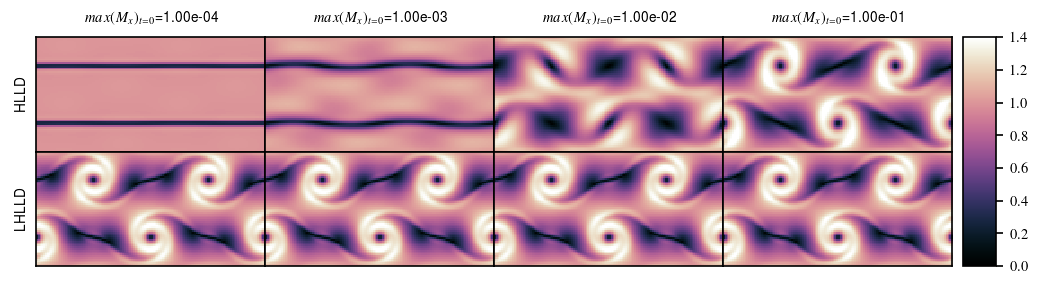

In [2]:
#fig,axs=plt.subplots(2,4,figsize=(pwidth, 0.5*pwidth), dpi=scrdpi)

fig,axs,ex=generate_grid(4,2,0.105,0,0.0,2,px=1.,py=0.4)

fluxes = ['HLLD','LHLLD']
Ms     = ['1e-4','1e-3','1e-2','1e-1']
nxs    = [128]

for i,fdr in enumerate(fluxes): 
 for j,M in enumerate(Ms):
   for nx in nxs:
    
    
         try:
    
             data = numpy.load('./snapshots-old/%s-M-%s-nx-%d.npz'%(fdr,M,nx))

             im = axs[i,j].imshow(data['mach_16'].T/float(M),vmin=0,vmax=1.4,origin='lower')
            
             axs[i,j].xaxis.set_ticks([])
             axs[i,j].yaxis.set_ticks([])
            
             if(j==0):
                axs[0,j].set_ylabel('HLLD',fontsize=textsize)
                axs[1,j].set_ylabel('LHLLD',fontsize=textsize)
         
             if(i==0):
                axs[i,j].set_title(r'$max(M_{x})_{t=0}$'+'=%.2e'%(float(M)),fontsize=textsize)

         except:
            
            print('data not available')
            


axColor = plt.axes([1-ex[0] + 0.01,ex[1],0.03,1-2*ex[1]])
plt.colorbar(im, cax = axColor, orientation="vertical")



plt.savefig('C1.pdf',dpi=savedpi)

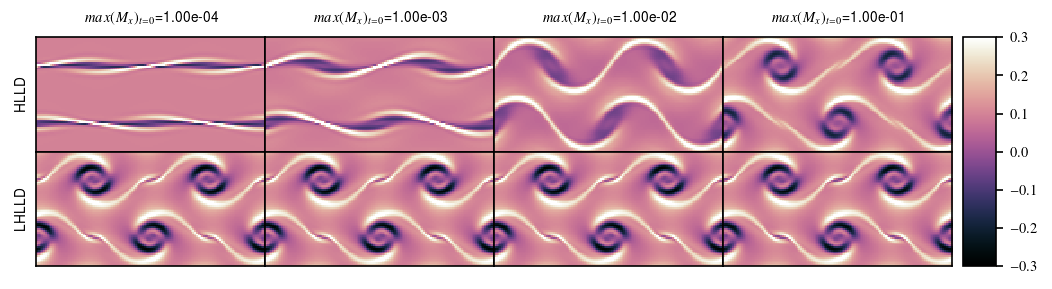

In [3]:

fig,axs,ex=generate_grid(4,2,0.105,0,0.0,2,px=1.,py=0.4)


fluxes = ['HLLD','LHLLD']
Ms     = ['1e-4','1e-3','1e-2','1e-1']
nxs    = [128]

for i,fdr in enumerate(fluxes): 
 for j,M in enumerate(Ms):
   for nx in nxs:
    
         data = numpy.load('./snapshots-old/%s-M-%s-nx-%d.npz'%(fdr,M,nx))

         im = axs[i,j].imshow(data['bx_16'].T/float(M),vmin=-0.3,vmax=0.3,origin='lower')
            
         axs[i,j].xaxis.set_ticks([])
         axs[i,j].yaxis.set_ticks([])
            
         if(j==0):
            axs[0,j].set_ylabel('HLLD',fontsize=textsize)
            axs[1,j].set_ylabel('LHLLD',fontsize=textsize)
         
         if(i==0):
            axs[i,j].set_title(r'$max(M_{x})_{t=0}$'+'=%.2e'%(float(M)),fontsize=textsize)

            
            
axColor = plt.axes([1-ex[0] + 0.01,ex[1],0.03,1-2*ex[1]])
plt.colorbar(im, cax = axColor, orientation="vertical")

#fig.subplots_adjust(wspace=0,left=0.03,right=0.97)
#fig.colorbar(im, ax=axs, location='bottom',pad=0.05,aspect=40)

plt.savefig('C2.pdf',dpi=savedpi)


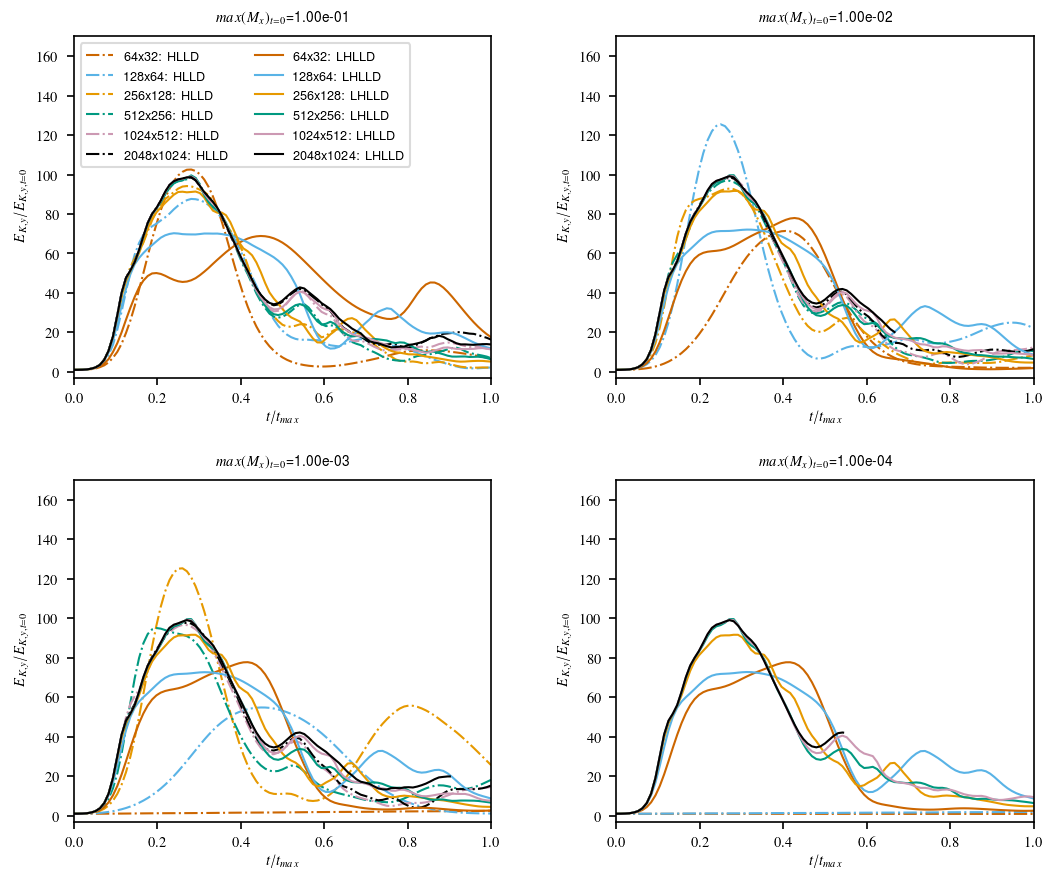

In [4]:
fig,axs=plt.subplots(2,2,figsize=(1*pwidth, 0.8*pwidth), dpi=scrdpi)


fluxes = ['HLLD','LHLLD']
Ms     = ['1e-1','1e-2','1e-3','1e-4']
nxs    = [64,128,256,512,1024,2048]


ix = 0
iy = 0


tmax = numpy.array((1e0,1e1,1e2,1e3))
tmax *= 48

for i,M in enumerate(Ms):
 for fdr in fluxes: 
   for j,nx in enumerate(nxs):
    
       try:
    
         data = numpy.load('./temporal_profiles/%s-M-%s-nx-%d.npz'%(fdr,M,nx))

         t    = data['t']
         ekin = data['ekin']

        
         if(fdr=='LHLLD'):
            lsf='-'
         else:
            lsf='-.'
            
         if(nx==2048):
                lc[j] = 'black'
 
        
         if(len(t)>5):
             axs[ix,iy].plot(t/tmax[i],ekin/ekin[0],color=lc[j],ls=lsf,label='%dx%d: %s'%(nx,nx//2,fdr))

    
       except:
            
         print('ops')
            
 axs[ix,iy].set_xlabel(r'$t/t_{max}$',fontsize=textsize)
 axs[ix,iy].set_ylabel(r'$E_{K,y} / E_{K,y,t=0} $',fontsize=textsize)

 axs[ix,iy].set_ylim(-3,170)
 axs[ix,iy].set_xlim(0,1)

 axs[ix,iy].set_title(r'$max(M_{x})_{t=0}$'+'=%.2e'%(float(M)),fontsize=textsize)
 
    

 iy+=1
 if(iy==2):
   ix+=1
 if(iy>=2):
     iy=0

axs[0,0].legend(ncol=2,loc='upper left')   
fig.subplots_adjust(wspace=0.3,hspace=0.3,bottom=0.06,top=0.96,left=0.07,right=0.95)        

plt.savefig('C3.pdf',dpi=savedpi)

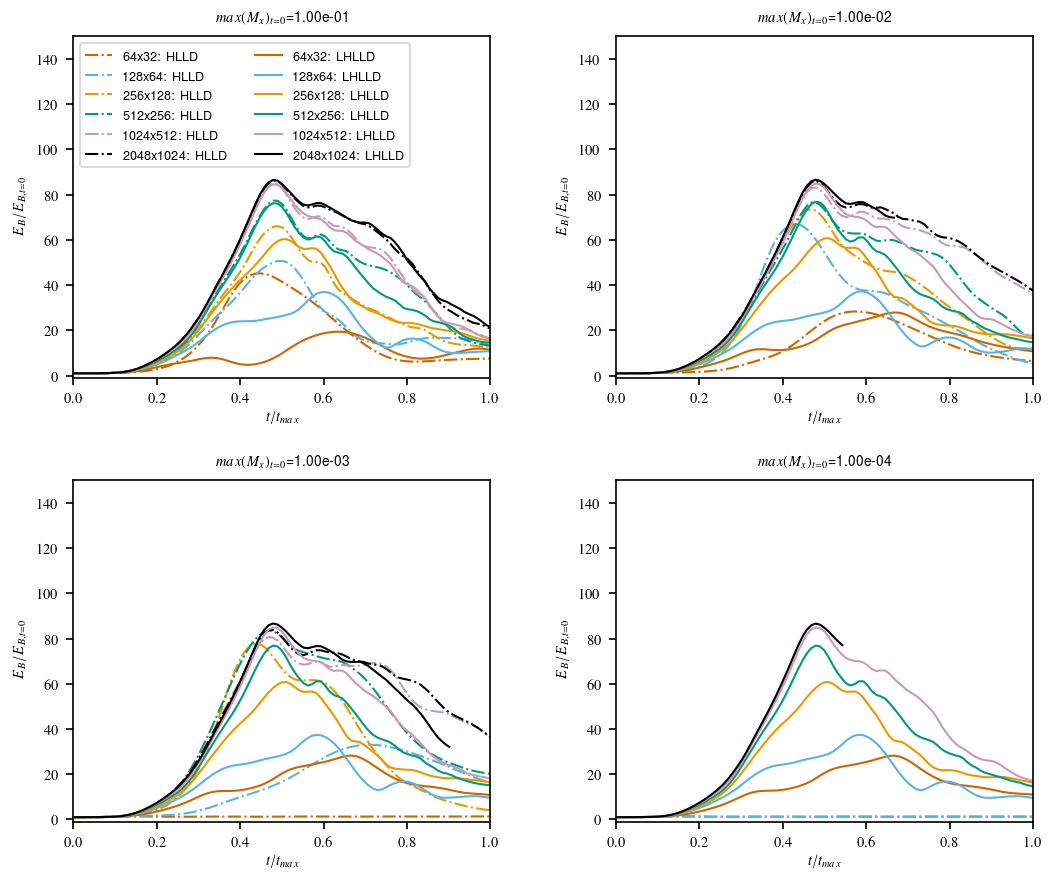

In [5]:
fig,axs=plt.subplots(2,2,figsize=(pwidth, 0.8*pwidth), dpi=scrdpi)


fluxes = ['HLLD','LHLLD']
Ms     = ['1e-1','1e-2','1e-3','1e-4']
nxs    = [64,128,256,512,1024,2048]


ix = 0
iy = 0


tmax = numpy.array((1e0,1e1,1e2,1e3))
tmax *= 48

for i,M in enumerate(Ms):
 for fdr in fluxes: 
   for j,nx in enumerate(nxs):
    
       try:
    
         data = numpy.load('./temporal_profiles/%s-M-%s-nx-%d.npz'%(fdr,M,nx))

         t    = data['t']
         eb   = data['eb']
        
         if(nx==2048):
                lc[j] = 'black'
         if(fdr=='LHLLD'):
            lsf='-'
         else:
            lsf='-.'
        
         if(len(t)>5):
             axs[ix,iy].plot(t/tmax[i],eb/eb[0],color=lc[j],ls=lsf,label='%dx%d: %s'%(nx,nx//2,fdr))

    
       except:
            
         print('ops')
            
 axs[ix,iy].set_xlabel(r'$t/t_{max}$',fontsize=textsize)
 axs[ix,iy].set_ylabel(r'$E_{B} / E_{B,t=0} $',fontsize=textsize)

 axs[ix,iy].set_ylim(-1,150)
 axs[ix,iy].set_xlim(0,1)

 axs[ix,iy].set_title(r'$max(M_{x})_{t=0}$'+'=%.2e'%(float(M)),fontsize=textsize)
    

 iy+=1
 if(iy==2):
   ix+=1
 if(iy>=2):
     iy=0

        

#axs[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.7))        
fig.subplots_adjust(wspace=0.3,hspace=0.3,bottom=0.06,top=0.96,left=0.07,right=0.95)        

axs[0,0].legend(ncol=2,loc='upper left')   

plt.savefig('C4.pdf',dpi=savedpi)

ops
ops
ops


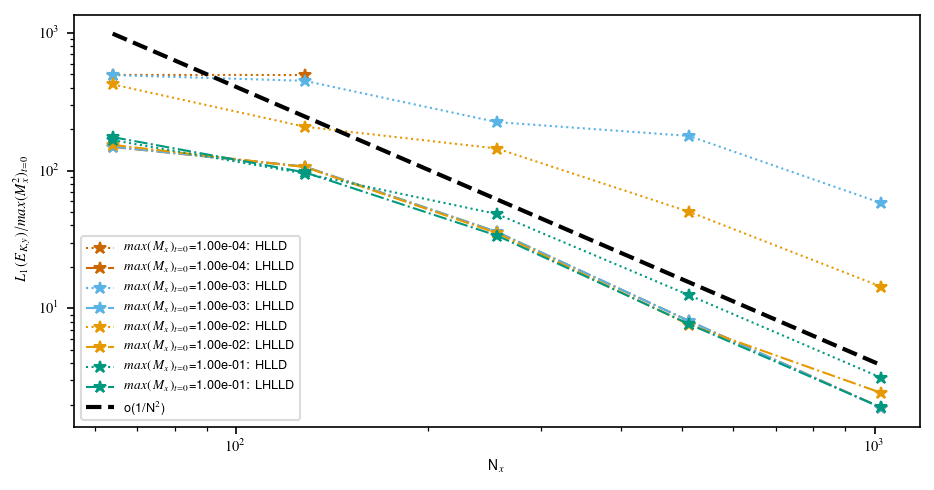

In [40]:
fig,axs=plt.subplots(1,figsize=(pwidth, 0.5*pwidth), dpi=scrdpi)


fluxes = ['LHLLD','HLLD']
Ms     = ['1e-4','1e-3','1e-2','1e-1']
nxs    = [64,128,256,512,1024]





for i,M in enumerate(Ms):
    

   L1_HLLD  = []
   L1_LHLLD = []
    
   for j,nx in enumerate(nxs):
    
       try:
    
         data = numpy.load('./L1_N/LHLLD-M-%s-nx-%d.npz'%(M,nx))
         l1_ekiny    = data['l1_ekiny']
         L1_LHLLD.append(l1_ekiny/float(M)**2)

         data = numpy.load('./L1_N/HLLD-M-%s-nx-%d.npz'%(M,nx))
         l1_ekiny    = data['l1_ekiny']
         L1_HLLD.append(l1_ekiny/float(M)**2)
        
       except:
            
         print('ops')
    
   axs.plot(nxs[:len(L1_HLLD)],L1_HLLD,color=lc[i],marker='*',ls=':',label=r'$max(M_{x})_{t=0}$'+'=%.2e: HLLD'%(float(M)))
   axs.plot(nxs[:len(L1_LHLLD)],L1_LHLLD,color=lc[i],marker='*',ls='-.',label=r'$max(M_{x})_{t=0}$'+'=%.2e: LHLLD'%(float(M)))
    
   if(M=='1e-3'):
      xref = numpy.array(nxs)
      L1_ref = L1_HLLD[0].copy()

    
axs.plot(xref,2*L1_ref*(xref[0]/xref)**2,color='black',ls='--',lw=2,label='o(1/N'+r'$^2$'+')')


plt.yscale('log')
plt.xscale('log')
plt.xlabel('N'+r'$_x$')
plt.ylabel(r'$L_1(E_{K,y}) / max(M_{x}^2)_{t=0}$')
plt.legend()
plt.savefig('C5.pdf',dpi=savedpi)

ops
ops
ops


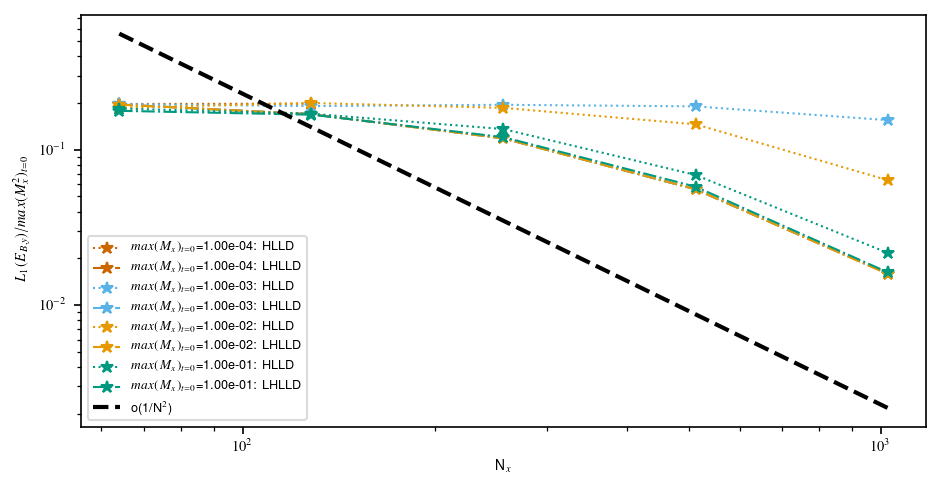

In [41]:
fig,axs=plt.subplots(1,figsize=(pwidth, 0.5*pwidth), dpi=scrdpi)


fluxes = ['LHLLD','HLLD']
Ms     = ['1e-4','1e-3','1e-2','1e-1']
nxs    = [64,128,256,512,1024]





for i,M in enumerate(Ms):
    

   L1_HLLD  = []
   L1_LHLLD = []
    
   for j,nx in enumerate(nxs):
    
       try:
    
         data = numpy.load('./L1_N/LHLLD-M-%s-nx-%d.npz'%(M,nx))
         l1_emag    = data['l1_emag']
         L1_LHLLD.append(l1_emag/float(M)**2)

         data = numpy.load('./L1_N/HLLD-M-%s-nx-%d.npz'%(M,nx))
         l1_emag    = data['l1_emag']
         L1_HLLD.append(l1_emag/float(M)**2)
        
       except:
            
         print('ops')
    
   axs.plot(nxs[:len(L1_HLLD)],L1_HLLD,color=lc[i],marker='*',ls=':',label=r'$max(M_{x})_{t=0}$'+'=%.2e: HLLD'%(float(M)))
   axs.plot(nxs[:len(L1_LHLLD)],L1_LHLLD,color=lc[i],marker='*',ls='-.',label=r'$max(M_{x})_{t=0}$'+'=%.2e: LHLLD'%(float(M)))
    
    
   if(M=='1e-2'):
      xref = numpy.array(nxs)
      L1_ref = L1_HLLD[0].copy()

    
axs.plot(xref,L1_ref*3*(xref[0]/xref)**2,color='black',ls='--',lw=2,label='o(1/N'+r'$^2$'+')')



plt.yscale('log')
plt.xscale('log')
plt.xlabel('N'+r'$_x$')
plt.ylabel(r'$L_1(E_{B,y}) / max(M^2_{x})_{t=0}$')
plt.legend()
plt.savefig('C6.pdf',dpi=savedpi)

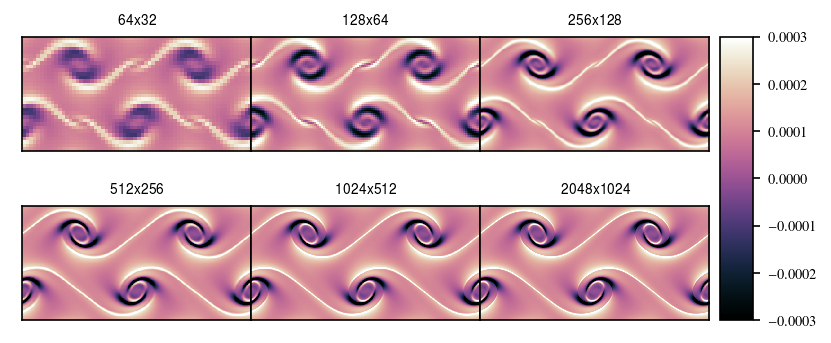

In [38]:

fig,axs,ex=generate_grid(3,2,0.105,0.,0.05,2,px=1.,py=0.4)


fdr    = 'LHLLD'
M      = '1e-3'
nxs    = [[64,128,256],[512,1024,2048]]

for i in range(0,2):
    for j in range(0,3):
        
        
         nx = nxs[i][j]
         axs[i,j].xaxis.set_ticks([])
         axs[i,j].yaxis.set_ticks([])


         axs[i,j].set_title('%dx%d'%(nx,nx//2),fontsize=textsize)    
        
         try:

  

             data = numpy.load('./snapshots-res/%s-M-%s-nx-%d.npz'%(fdr,M,nx))
             im = axs[i,j].imshow(data['bx'][0].T,origin='lower',vmin=-3e-4,vmax=3e-4)



         except:
             print('data not available')    


axColor = plt.axes([1-ex[0] + 0.01,ex[1],0.03,1-2*ex[1]])
plt.colorbar(im, cax = axColor, orientation="vertical")



plt.savefig('C7.pdf',dpi=savedpi)


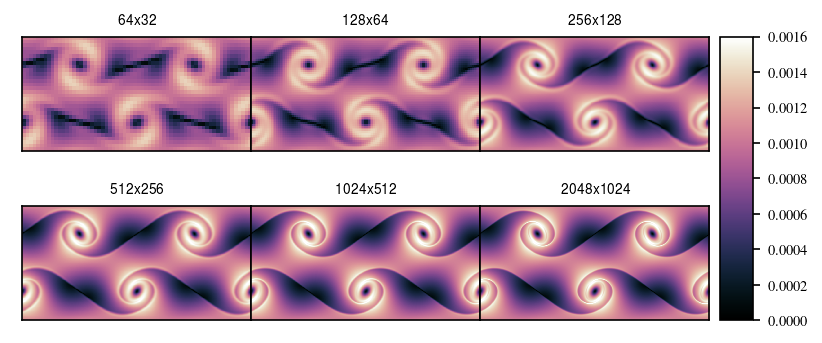

In [25]:

fig,axs,ex=generate_grid(3,2,0.105,0.,0.05,2,px=1.,py=0.4)


fdr    = 'LHLLD'
M      = '1e-3'
nxs    = [[64,128,256],[512,1024,2048]]

for i in range(0,2):
    for j in range(0,3):
        
        
         nx = nxs[i][j]
         axs[i,j].xaxis.set_ticks([])
         axs[i,j].yaxis.set_ticks([])


         axs[i,j].set_title('%dx%d'%(nx,nx//2),fontsize=textsize)    
        
         try:

  

             data = numpy.load('./snapshots-res/%s-M-%s-nx-%d.npz'%(fdr,M,nx))
             im = axs[i,j].imshow(data['mach'][0].T,origin='lower',vmin=0.,vmax=1.6e-3)



         except:
             print('data not available')    


axColor = plt.axes([1-ex[0] + 0.01,ex[1],0.03,1-2*ex[1]])
plt.colorbar(im, cax = axColor, orientation="vertical")



plt.savefig('C8.pdf',dpi=savedpi)

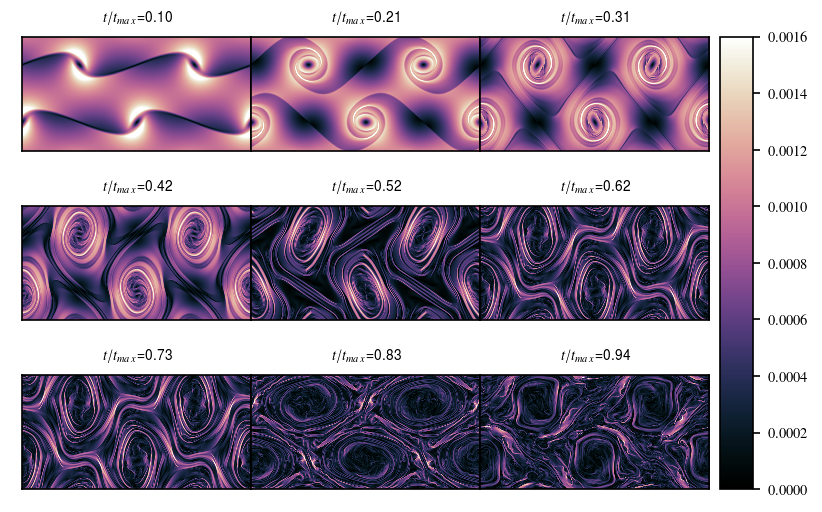

In [20]:

fig,axs,ex=generate_grid(3,3,0.105,0.,0.05,2,px=1.,py=0.6)


fdr    = 'LHLLD'
M      = '1e-3'
nx     = 2048
iss    = [[0,1,2],[3,4,5],[5,7,8]]

t = [[5,10,15],[20,25,30],[35,40,45]]

for i in range(0,3):
    for j in range(0,3):
        
        
         i_s = iss[i][j]
         axs[i,j].xaxis.set_ticks([])
         axs[i,j].yaxis.set_ticks([])


         axs[i,j].set_title(r'$t/t_{max}$'+'=%.2f'%(t[i][j]/48),fontsize=textsize)    
        
         #try:

  

         data = numpy.load('./snapshots/%s-M-%s-nx-%d.npz'%(fdr,M,nx))
         im = axs[i,j].imshow(data['mach'][i_s].T,origin='lower',vmin=0.,vmax=1.6e-3)



         #except:
         #    print('data not available')    

axColor = plt.axes([1-ex[0] + 0.01,ex[1],0.03,1-2*ex[1]])
plt.colorbar(im, cax = axColor, orientation="vertical")





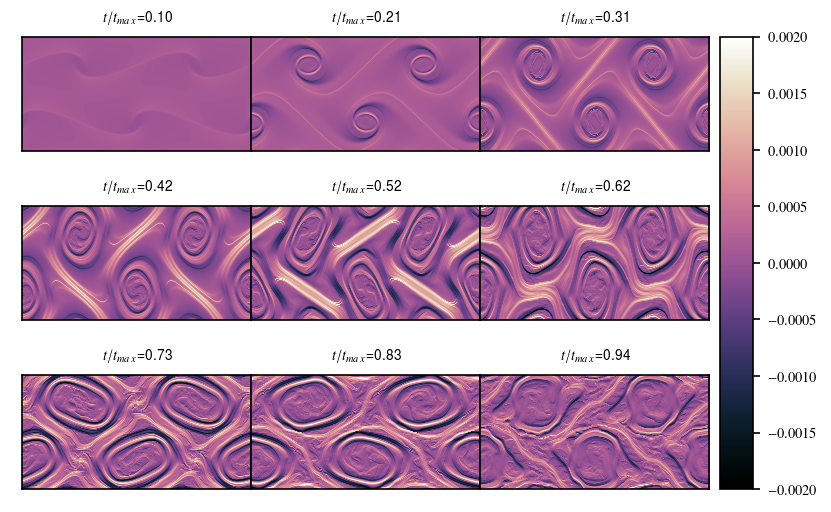

In [17]:

fig,axs,ex=generate_grid(3,3,0.105,0.,0.05,2,px=1.,py=0.6)


fdr    = 'LHLLD'
M      = '1e-3'
nx     = 2048
iss    = [[0,1,2],[3,4,5],[6,7,8]]

t = [[5,10,15],[20,25,30],[35,40,45]]

for i in range(0,3):
    for j in range(0,3):
        
        
         i_s = iss[i][j]
         axs[i,j].xaxis.set_ticks([])
         axs[i,j].yaxis.set_ticks([])


         axs[i,j].set_title(r'$t/t_{max}$'+'=%.2f'%(t[i][j]/48),fontsize=textsize)    
        
         #try:

  

         data = numpy.load('./snapshots/%s-M-%s-nx-%d.npz'%(fdr,M,nx))
         im = axs[i,j].imshow(data['bx'][i_s].T,origin='lower',vmin=-2e-3,vmax=2e-3)



         #except:
         #    print('data not available')    

axColor = plt.axes([1-ex[0] + 0.01,ex[1],0.03,1-2*ex[1]])
plt.colorbar(im, cax = axColor, orientation="vertical")



plt.savefig('C9.pdf',dpi=savedpi)